# Electric Machinery Fundamentals 5th edition
## Chapter 6 (Code examples)

## Example 6-6:
**Creates and plot of the torque-speed curve of an induction motor with a double-cage rotor design as depicted in Figure 6-29.**

**Note:** *You should first click on "`Cell` &rarr; `Run All`" in order that the plots get generated.*

Import the PyLab namespace (provides set of useful commands and constants like Pi)

In [1]:
%pylab inline
%config InlineBackend.figure_formats={'svg',}  # use high quality SVG instead of PNGs

Populating the interactive namespace from numpy and matplotlib


First, initialize the values needed in this program.

In [2]:
r1  =  0.641               # Stator resistance
x1  =  0.750               # Stator reactance
r2  =  0.300               # Rotor resistance for single cage motor
r2i =  0.400               # Rotor resistance for inner cage of double-cage motor
r2o =  3.200               # Rotor resistance for outercage of double-cage motor
x2  =  0.500               # Rotor reactance for single cage motor
x2i =  3.300               # Rotor reactance for inner cage of double-cage motor
x2o =  0.500               # Rotor reactance for outer cage of double-cage motor
xm  = 26.3                 # Magnetization branch reactance
v_phase =  460 / sqrt(3)    # Phase voltage
n_sync  = 1800              # Synchronous speed (r/min)
w_sync  = n_sync * 2*pi/60  # Synchronous speed (rad/s)

Calculate the Thevenin voltage and impedance from Equations 7-41a:

$$ V_{TH} =  V_\phi \frac{X_M}{\sqrt{R_1^2 + (X_1 + X_M)^2}} $$

and 7-43:

$$ Z_{TH} = \frac{jX_m (R_1 + jX_1)}{R_1 + j(X_1 + X_M)} $$

In [3]:
v_th = v_phase * ( xm / sqrt(r1**2 + (x1 + xm)**2) )
z_th = ((1j*xm) * (r1 + 1j*x1)) / (r1 + 1j*(x1 + xm))
r_th = real(z_th)
x_th = imag(z_th)

Now calculate the torque-speed characteristic for many slips between 0 and 1.

In [4]:
s = linspace(0, 1, 50) # slip
s[0] = 0.001           # avoid divide-by-zero problems  
nm = (1 - s) * n_sync  # mechanical speed

Calculate torque for the single-cage rotor using:

$$ \tau_\text{ind} = \frac{3 V_{TH}^2 R_2 / s}{\omega_\text{sync}[(R_{TH} + R_2/s)^2 + (X_{TH} + X_2)^2]} $$

In [5]:
t_ind1 = ((3 * v_th**2 * r2/s) / 
          (w_sync * ((r_th + r2/s)**2 + (x_th + x2)**2)))

Calculate resistance and reactance of the double-cage rotor at this slip, and then use those values to calculate the induced torque.  

In [6]:
y_r = 1/(r2i + 1j*s*x2i) + 1/(r2o + 1j*s*x2o)
z_r = 1/y_r            # Effective rotor impedance
r2eff = real(z_r)      # Effective rotor resistance
x2eff = imag(z_r)      # Effective rotor reactance

Calculate induced torque for double-cage rotor.

In [7]:
t_ind2 = ((3 * v_th**2 * (r2eff) / s) / 
          (w_sync * ((r_th + (r2eff)/s)**2 + (x_th + x2eff)**2)))

Plot the torque-speed curve:

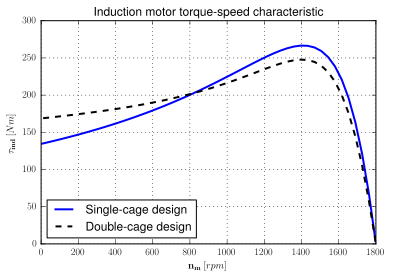

In [8]:
rc('text', usetex=True)   # enable LaTeX commands for plot
plot(nm, t_ind1,'b',
     nm, t_ind2,'k--',
     lw=2)
xlabel(r'$\mathbf{n_{m}}\ [rpm]$')
ylabel(r'$\mathbf{\tau_{ind}}\ [Nm]$')
title ('Induction motor torque-speed characteristic')
legend ((r'Single-cage design','Double-cage design'), loc = 3);
grid()